# Load the log and analyze the data


In [10]:
# Install necessary library if not already installed
# !pip install pm4py
from pm4py.objects.log.importer.xes.importer import apply as xes_importer
import pandas as pd

# Load the XES files
conformant_file = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\fitting_log_and.xes'
non_conformant_file = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_fitting_log_and.xes'

# Import XES logs
conformant_log = xes_importer(conformant_file)
non_conformant_log = xes_importer(non_conformant_file)

# Helper function to convert log to DataFrame
def log_to_dataframe(log):
    data = []
    for trace in log:
        for event in trace:
            event_data = {key: value for key, value in event.items()}
            event_data['case:concept:name'] = trace.attributes['concept:name']
            data.append(event_data)
    return pd.DataFrame(data)

# Convert logs to DataFrames
conformant_df = log_to_dataframe(conformant_log)
non_conformant_df = log_to_dataframe(non_conformant_log)

# Save logs as CSV for reference
# conformant_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_log_only_and.csv'
# non_conformant_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_log_only_and.csv'

# instead of using the above datasets, we will use the refined datasets, where we remove the outliers of data.
conformant_csv_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\conformant_students_cleaned.csv'
non_conformant_csv_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\non_conformant_students_cleaned.csv'

conformant_df.to_csv(conformant_csv_path, index=False)
non_conformant_df.to_csv(non_conformant_csv_path, index=False)

# Keywords for program analysis
program_keywords = [
    'Data science og datamangament, ing.bach.',
    'Industriel økonomi og teknologiledelse, cand.polyt.',
    'Byggeri og infrastruktur, ing.prof.bach.'
]

# Define the column name for programs
activity_column_name = "Program"

# Function to extract relevant programs
def extract_programs(df, keywords, activity_column):
    return df[df[activity_column].str.contains('|'.join(keywords), case=False, na=False)]

# Extract programs from conformant and non-conformant logs
conformant_programs = extract_programs(conformant_df, program_keywords, activity_column_name)
non_conformant_programs = extract_programs(non_conformant_df, program_keywords, activity_column_name)

# Save extracted programs to CSV for inspection
conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_programs_only_and.csv'
non_conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_programs_only_and.csv'

conformant_programs.to_csv(conformant_programs_csv, index=False)
non_conformant_programs.to_csv(non_conformant_programs_csv, index=False)

# Compare programs (group by 'Program' and count occurrences)
conformant_analysis = conformant_programs.groupby(activity_column_name).size()
non_conformant_analysis = non_conformant_programs.groupby(activity_column_name).size()

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Conformant': conformant_analysis,
    'Non-Conformant': non_conformant_analysis
}).fillna(0).astype(int)

# Save comparison results to CSV
comparison_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\program_comparison_only_and.csv'
comparison_df.to_csv(comparison_csv_path)

# Display output paths for inspection
print(f"Conformant Log CSV saved at: {conformant_csv_path}")
print(f"Non-Conformant Log CSV saved at: {non_conformant_csv_path}")
print(f"Conformant Programs CSV saved at: {conformant_programs_csv}")
print(f"Non-Conformant Programs CSV saved at: {non_conformant_programs_csv}")
print(f"Program Comparison CSV saved at: {comparison_csv_path}")


<>:33: SyntaxWarning: invalid escape sequence '\G'
<>:34: SyntaxWarning: invalid escape sequence '\G'
<>:33: SyntaxWarning: invalid escape sequence '\G'
<>:34: SyntaxWarning: invalid escape sequence '\G'
C:\Users\chens\AppData\Local\Temp\ipykernel_21156\755314224.py:33: SyntaxWarning: invalid escape sequence '\G'
  conformant_csv_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\conformant_students_cleaned.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_21156\755314224.py:34: SyntaxWarning: invalid escape sequence '\G'
  non_conformant_csv_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\non_conformant_students_cleaned.csv'
parsing log, completed traces :: 100%|██████████| 6051/6051 [00:04<00:00, 1285.30it/s]


Conformant Log CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\filtered_data\refined_and\conformant_students_cleaned.csv
Non-Conformant Log CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\filtered_data\refined_and\non_conformant_students_cleaned.csv
Conformant Programs CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\conformant_programs_only_and.csv
Non-Conformant Programs CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\non_conformant_programs_only_and.csv
Program Comparison CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\program_comparison_only_and.csv


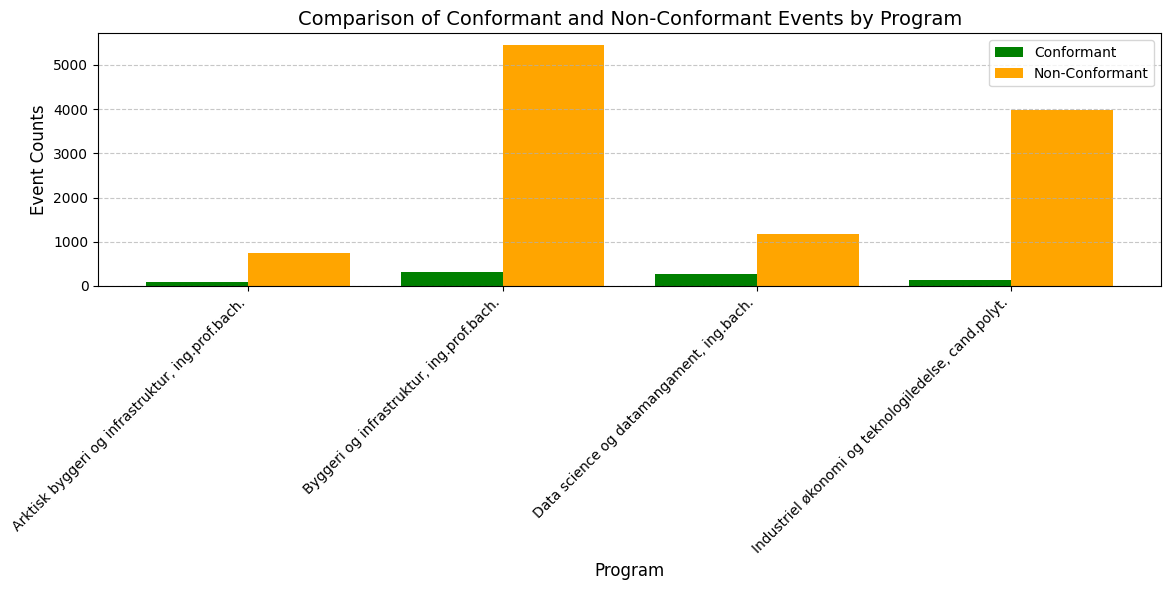

original data:
      Program  Conformant  Non-Conformant
0     Arktisk          87             742
1     Byggeri         307            5443
2        Data         268            1178
3  Industriel         134            3974


In [11]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
comparison_csv_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\program_comparison_only_and.csv'
comparison_df = pd.read_csv(comparison_csv_path)



# Visualize the Conformant and Non-Conformant numbers with full program names
plt.figure(figsize=(12, 6))
x = range(len(comparison_df["Program"]))

# Bar width for Conformant and Non-Conformant counts
bar_width = 0.4

# Create bars for Conformant and Non-Conformant
plt.bar(x, comparison_df["Conformant"], width=bar_width, label='Conformant', color='green', align='center')
plt.bar([p + bar_width for p in x], comparison_df["Non-Conformant"], width=bar_width, label='Non-Conformant', color='orange', align='center')

# Add labels, title, and legend
plt.xlabel("Program", fontsize=12)
plt.ylabel("Event Counts", fontsize=12)
plt.title("Comparison of Conformant and Non-Conformant Events by Program", fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], comparison_df["Program"], rotation=45, ha="right", fontsize=10)
plt.legend()

# Add grid for better visualization
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# show the data
print("original data:")
# make an abbr for the program name
comparison_df['Program'] = comparison_df['Program'].str.extract(r'([A-Za-z]+)')
print(comparison_df)




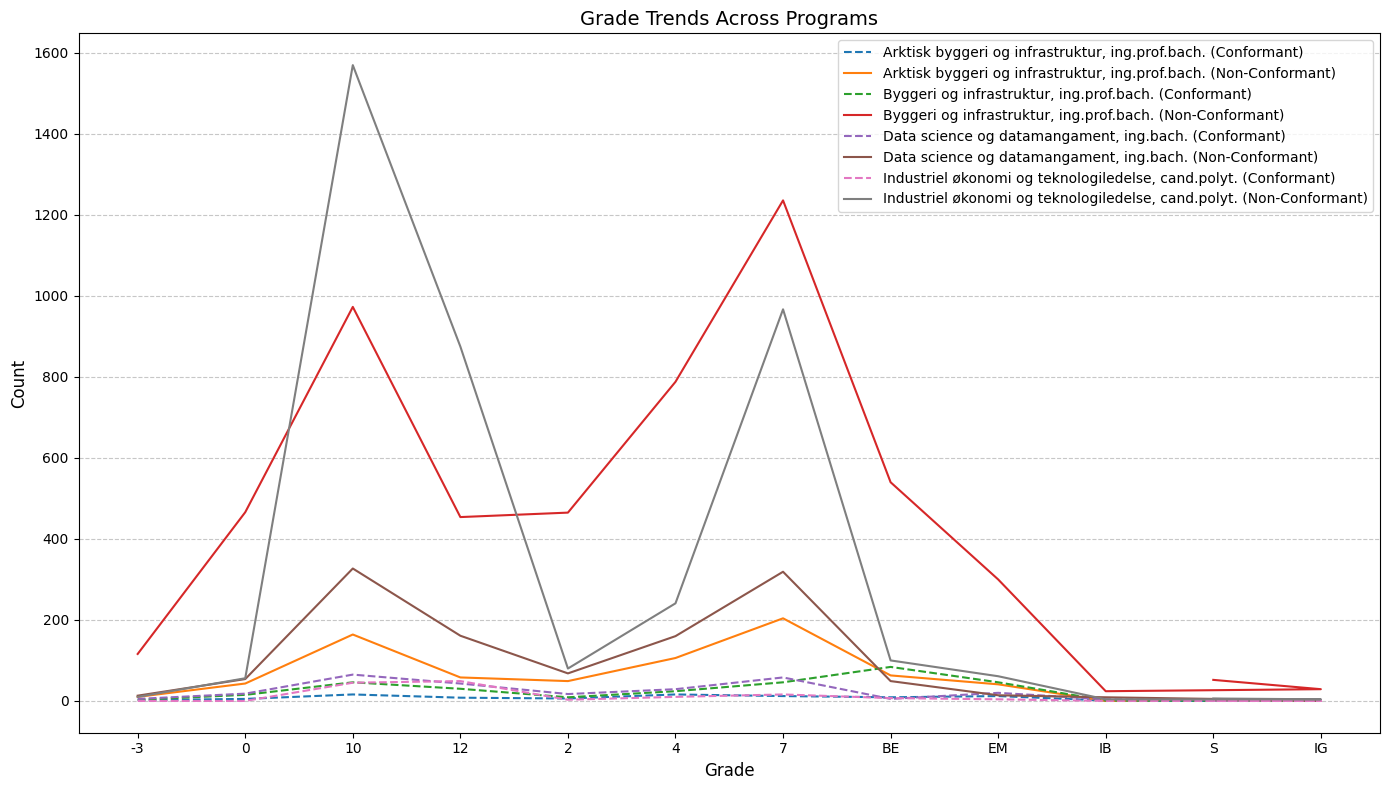

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the program data CSV files
conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_programs_only_and.csv'
non_conformant_programs_csv = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_programs_only_and.csv'

# Load the data
conformant_programs = pd.read_csv(conformant_programs_csv)
non_conformant_programs = pd.read_csv(non_conformant_programs_csv)

# Combine conformant and non-conformant data
conformant_programs['Type'] = 'Conformant'
non_conformant_programs['Type'] = 'Non-Conformant'
combined_programs = pd.concat([conformant_programs, non_conformant_programs], ignore_index=True)

# Group by Program and Grade, then count occurrences
grade_trends = combined_programs.groupby(['Program', 'Grade', 'Type']).size().reset_index(name='Count')

# Pivot data for visualization
pivot_trends = grade_trends.pivot_table(index=['Program', 'Grade'], columns='Type', values='Count', fill_value=0)

# Reset index for easy plotting
pivot_trends.reset_index(inplace=True)

# Plot Grade Trends by Program
plt.figure(figsize=(14, 8))
for program in pivot_trends['Program'].unique():
    program_data = pivot_trends[pivot_trends['Program'] == program]
    plt.plot(program_data['Grade'], program_data['Conformant'], label=f'{program} (Conformant)', linestyle='--')
    plt.plot(program_data['Grade'], program_data['Non-Conformant'], label=f'{program} (Non-Conformant)')

# Add labels, legend, and title
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Grade Trends Across Programs', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



Average Grade Comparison Across Programs:
                                             Program  \
0   Arktisk byggeri og infrastruktur, ing.prof.bach.   
1           Byggeri og infrastruktur, ing.prof.bach.   
2           Data science og datamangament, ing.bach.   
3  Industriel økonomi og teknologiledelse, cand.p...   

   Conformant Average Grade  Non-Conformant Average Grade  
0                  6.307692                      6.712934  
1                  7.208092                      6.128057  
2                  7.263830                      7.415608  
3                  9.723577                      8.966307  


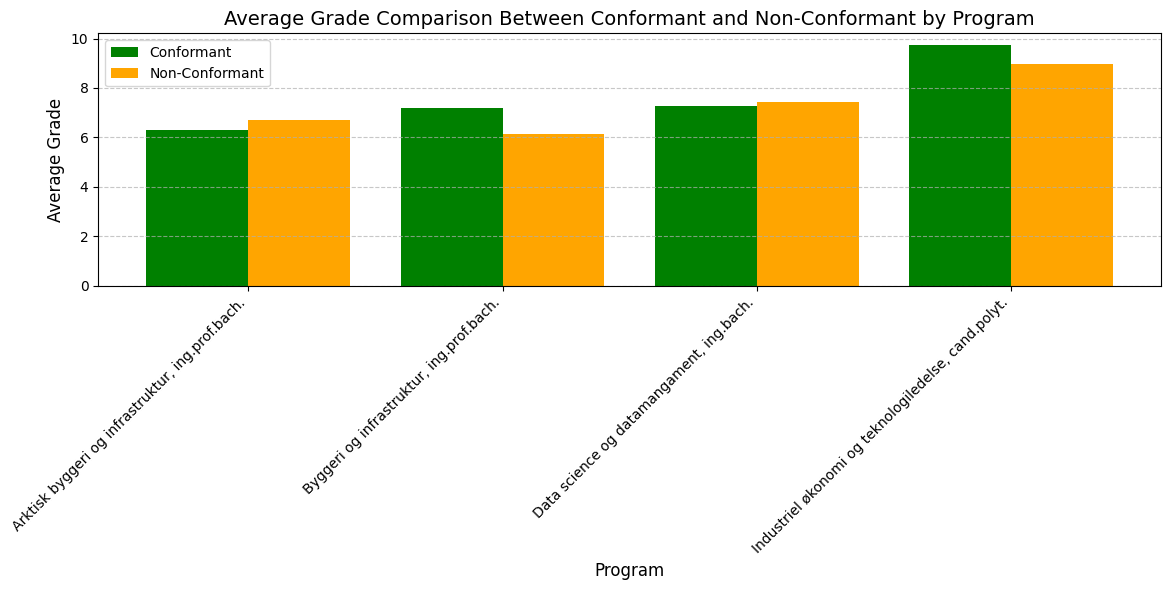

In [13]:
# Calculate average grades separately for conformant and non-conformant data
if 'Grade' in conformant_programs.columns and 'Grade' in non_conformant_programs.columns:
    # Convert 'Grade' to numeric if not already
    conformant_programs['Grade'] = pd.to_numeric(conformant_programs['Grade'], errors='coerce')
    non_conformant_programs['Grade'] = pd.to_numeric(non_conformant_programs['Grade'], errors='coerce')
    
    # Calculate average grade per program for conformant
    conformant_avg_grade = conformant_programs.groupby('Program')['Grade'].mean().reset_index()
    conformant_avg_grade.columns = ['Program', 'Conformant Average Grade']
    
    # Calculate average grade per program for non-conformant
    non_conformant_avg_grade = non_conformant_programs.groupby('Program')['Grade'].mean().reset_index()
    non_conformant_avg_grade.columns = ['Program', 'Non-Conformant Average Grade']
    
    # Merge results for comparison
    avg_grade_comparison = pd.merge(conformant_avg_grade, non_conformant_avg_grade, on='Program', how='outer')
    
    # Print the average grades
    print("\nAverage Grade Comparison Across Programs:")
    print(avg_grade_comparison)
    
    # Plot the average grades
    plt.figure(figsize=(12, 6))
    bar_width = 0.4
    x = range(len(avg_grade_comparison["Program"]))
    
    # Conformant bars
    plt.bar(x, avg_grade_comparison["Conformant Average Grade"], width=bar_width, label='Conformant', color='green', align='center')
    
    # Non-Conformant bars
    plt.bar([p + bar_width for p in x], avg_grade_comparison["Non-Conformant Average Grade"], width=bar_width, label='Non-Conformant', color='orange', align='center')
    
    # Add labels, title, and legend
    plt.xlabel("Program", fontsize=12)
    plt.ylabel("Average Grade", fontsize=12)
    plt.title("Average Grade Comparison Between Conformant and Non-Conformant by Program", fontsize=14)
    plt.xticks([p + bar_width / 2 for p in x], avg_grade_comparison["Program"], rotation=45, ha="right", fontsize=10)
    plt.legend()
    
    # Add grid for better visualization
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The dataset does not contain a 'Grade' column for analysis.")


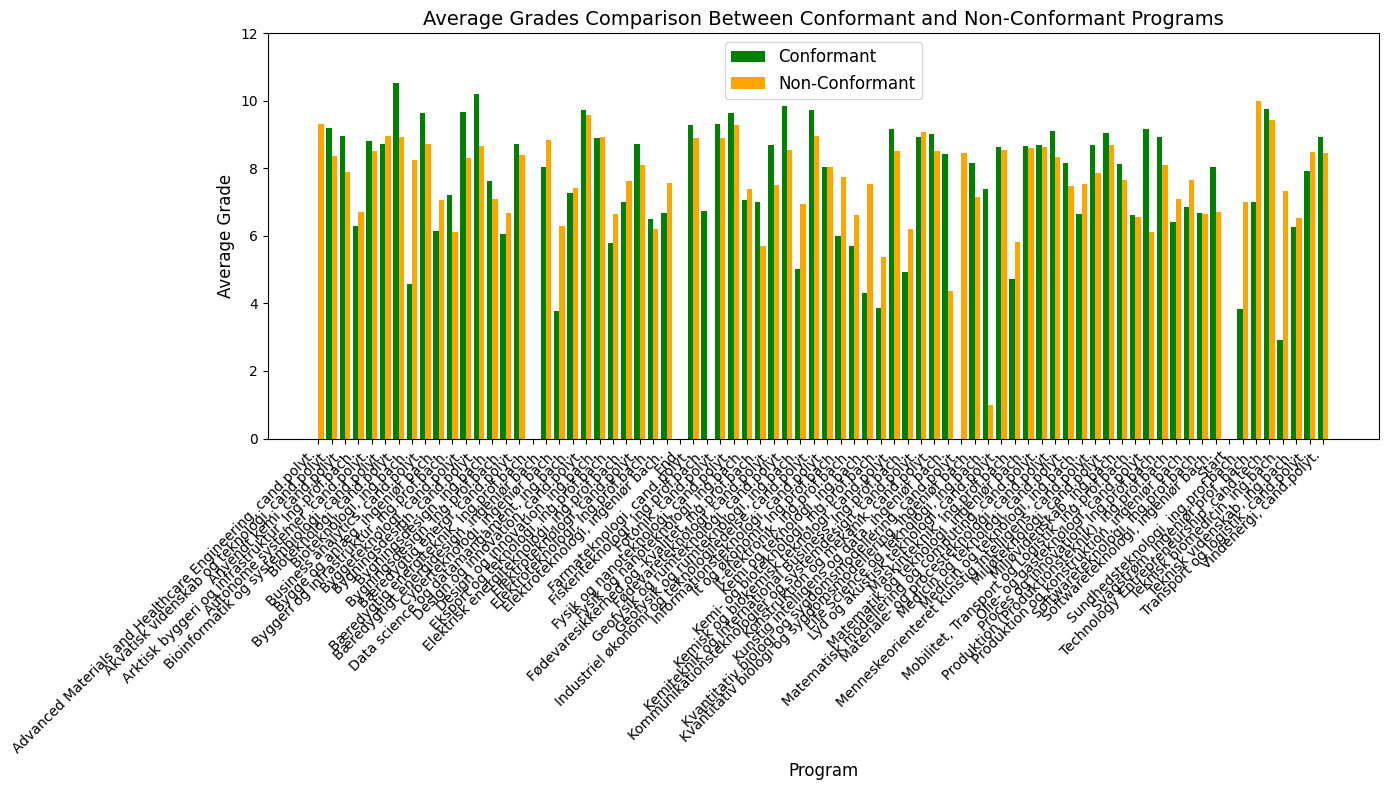

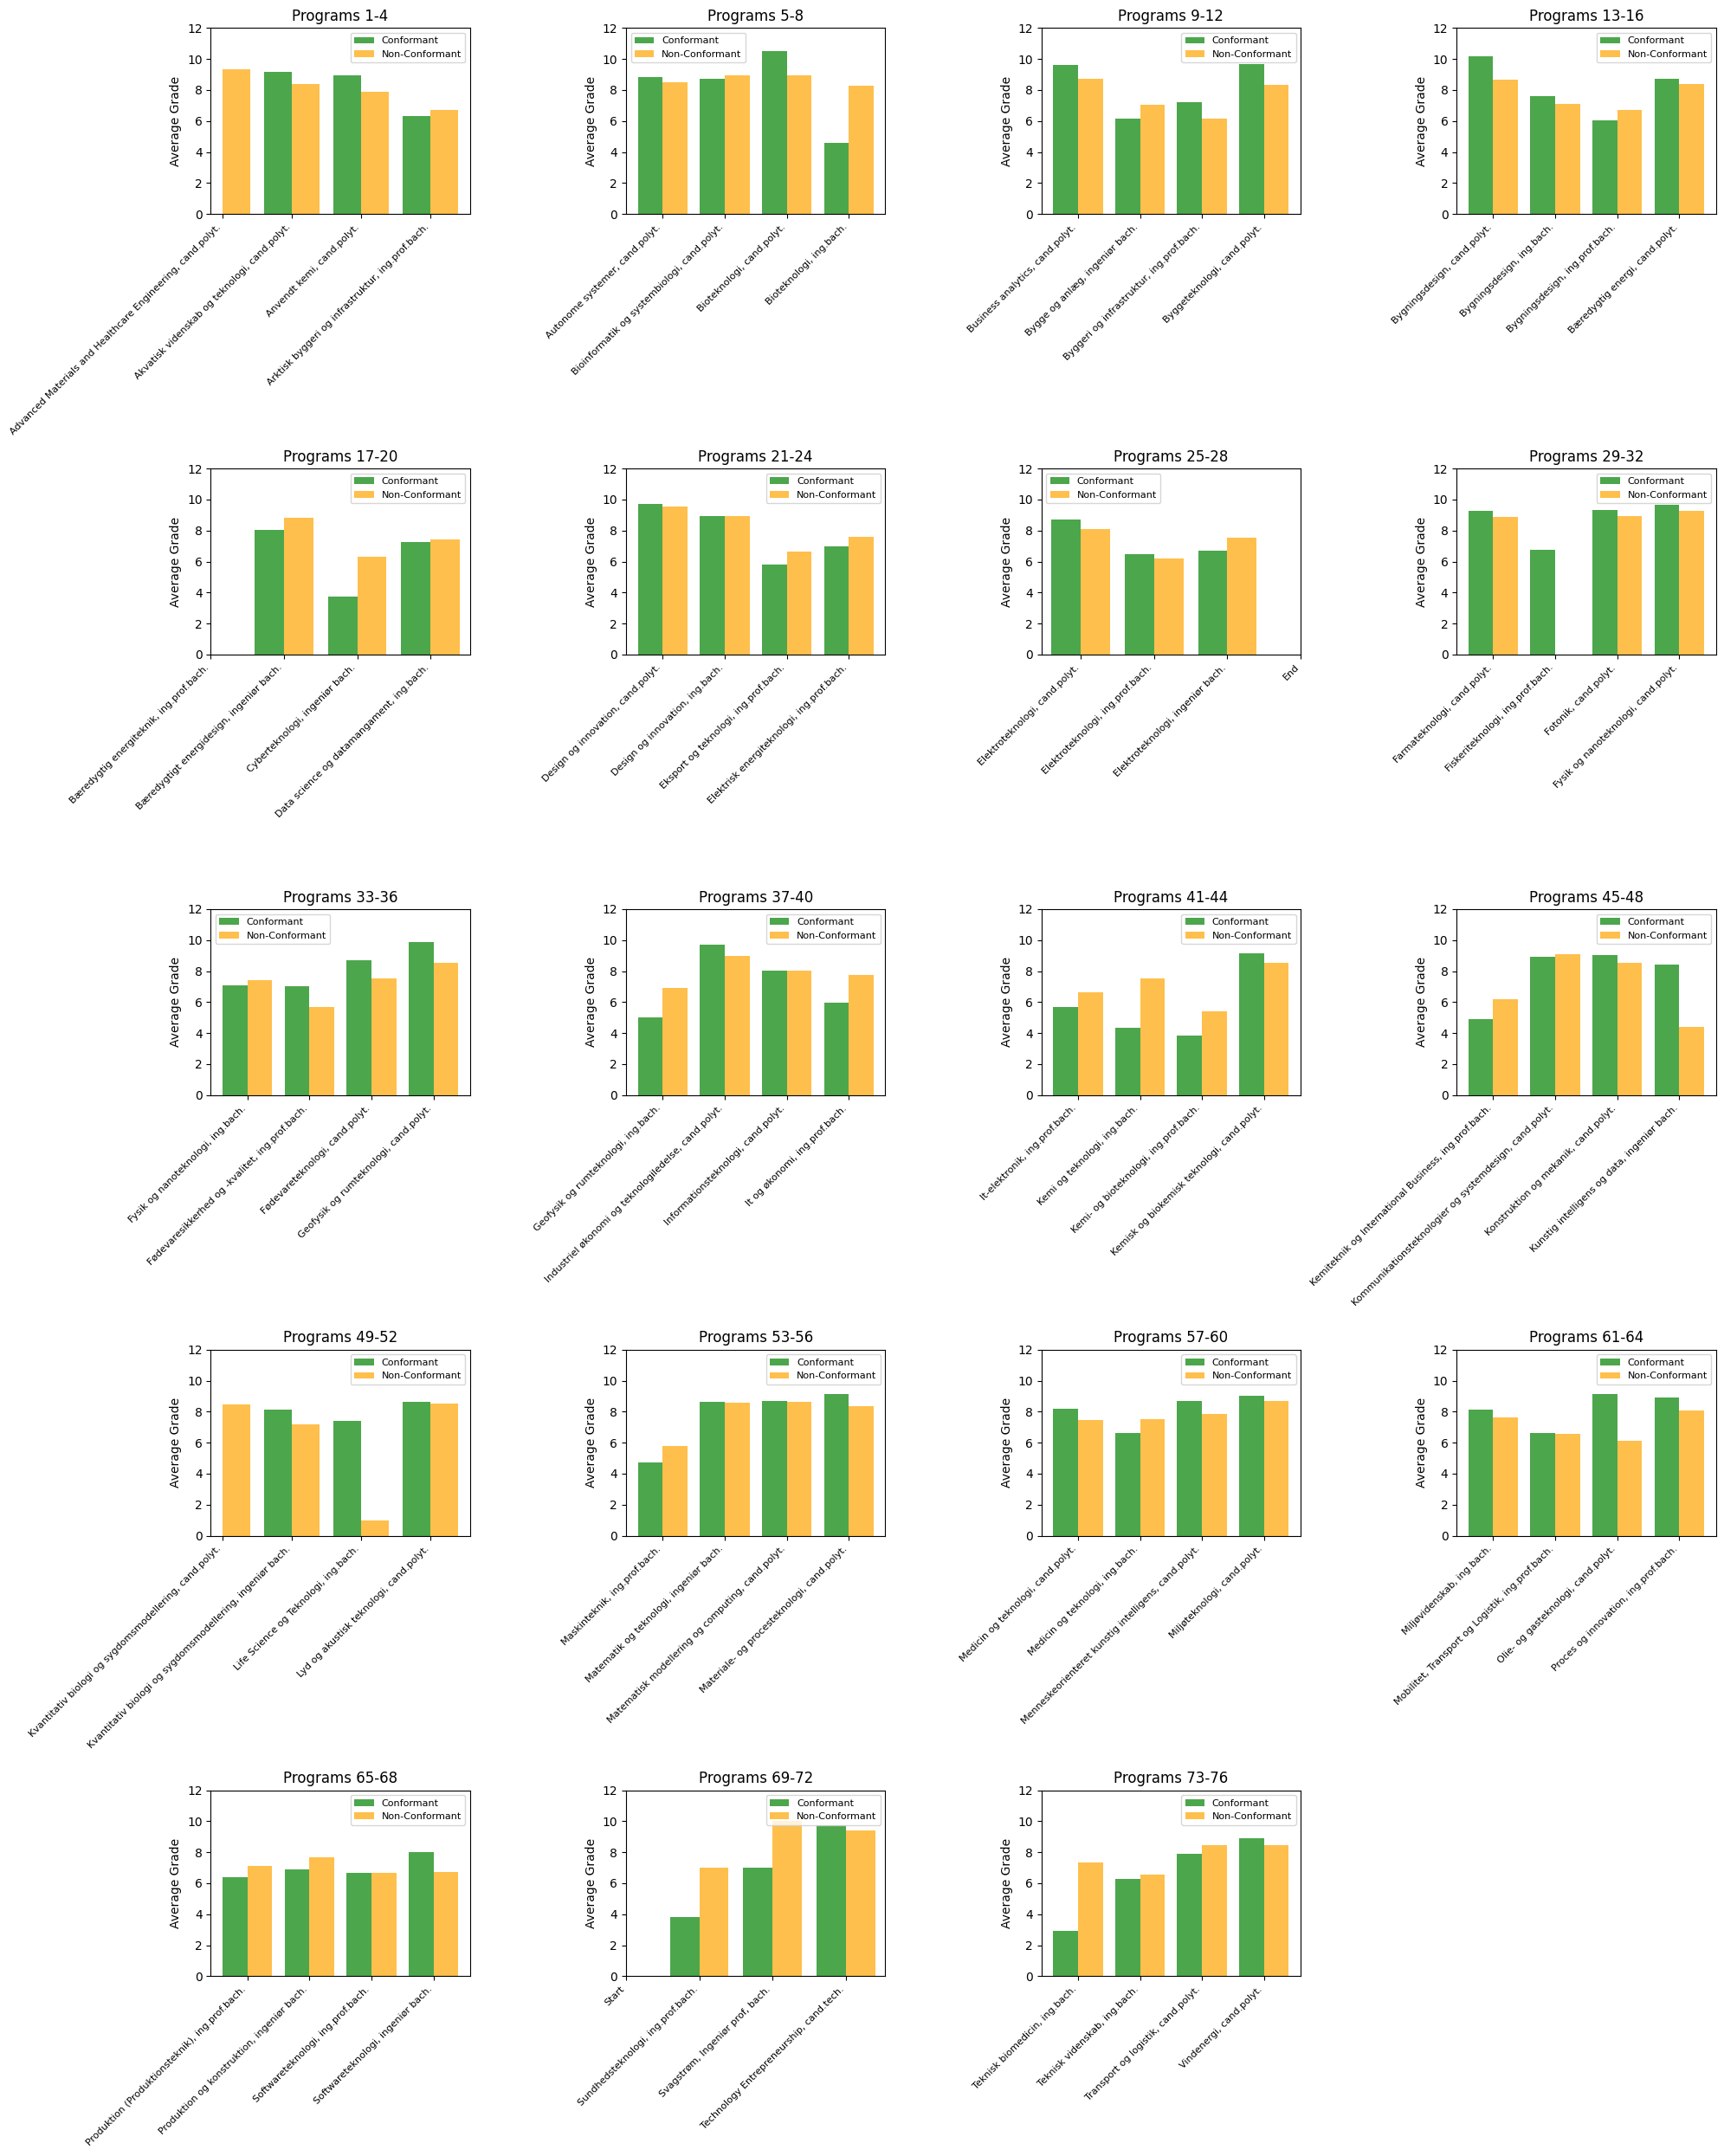

In [14]:
# add the program name to the data
comparison_df['Program'] = comparison_df['Program'].str.extract(r'([A-Za-z]+)')
# Load the data
conformant_data = pd.read_csv(conformant_csv_path)
non_conformant_data = pd.read_csv(non_conformant_csv_path)

# Compute average grades for Conformant and Non-Conformant across all programs
if 'Grade' in conformant_data.columns and 'Grade' in non_conformant_data.columns:
    # Convert 'Grade' to numeric for proper computation
    conformant_data['Grade'] = pd.to_numeric(conformant_data['Grade'], errors='coerce')
    non_conformant_data['Grade'] = pd.to_numeric(non_conformant_data['Grade'], errors='coerce')

    # Calculate average grades for conformant and non-conformant programs
    avg_conformant_grades = conformant_data.groupby('Program')['Grade'].mean().reset_index()
    avg_non_conformant_grades = non_conformant_data.groupby('Program')['Grade'].mean().reset_index()

    # Merge the results for comparison
    avg_grade_comparison = pd.merge(
        avg_conformant_grades,
        avg_non_conformant_grades,
        on='Program',
        how='outer',
        suffixes=('_Conformant', '_Non_Conformant')
    )

    # # Display the average grades comparison
    # print("\nAverage Grades Comparison Across Programs:")
    # print(avg_grade_comparison)

    # Plot the average grades
    plt.figure(figsize=(14, 8))
    bar_width = 0.4
    x = range(len(avg_grade_comparison))

    # Plot Conformant Average Grades
    plt.bar(
        [i - bar_width / 2 for i in x],
        avg_grade_comparison['Grade_Conformant'],
        width=bar_width,
        label='Conformant',
        color='green'
    )

    # Plot Non-Conformant Average Grades
    plt.bar(
        [i + bar_width / 2 for i in x],
        avg_grade_comparison['Grade_Non_Conformant'],
        width=bar_width,
        label='Non-Conformant',
        color='orange'
    )

    # Add labels, title, and legend
    plt.xlabel('Program', fontsize=12)
    plt.ylabel('Average Grade', fontsize=12)
    plt.ylim(0, 12)
    plt.title('Average Grades Comparison Between Conformant and Non-Conformant Programs', fontsize=14)
    plt.xticks(x, avg_grade_comparison['Program'], rotation=45, ha='right', fontsize=10)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Grade column is missing in the dataset!")
    
# Generate charts with the required layout based on the uploaded example

# Number of programs and layout configuration
num_programs = len(avg_grade_comparison)
programs_per_chart = 4  # Each chart displays 4 programs
charts_per_row = 4  # 4 charts per row
total_charts = -(-num_programs // programs_per_chart)  # Total number of charts (ceiling division)
rows = -(-total_charts // charts_per_row)  # Total rows

# Create subplots
fig, axes = plt.subplots(rows, charts_per_row, figsize=(20, rows * 5))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, ax in enumerate(axes):
    start_idx = i * programs_per_chart
    end_idx = start_idx + programs_per_chart

    if start_idx < num_programs:
        # Extract data for the current set of programs
        sub_data = avg_grade_comparison.iloc[start_idx:end_idx]
        x = range(len(sub_data))
        
        # Plot conformant and non-conformant grades
        ax.bar(
            [j - 0.2 for j in x],
            sub_data['Grade_Conformant'],
            width=0.4,
            label='Conformant',
            color='green',
            alpha=0.7
        )
        ax.bar(
            [j + 0.2 for j in x],
            sub_data['Grade_Non_Conformant'],
            width=0.4,
            label='Non-Conformant',
            color='orange',
            alpha=0.7
        )
        
        # Set title, labels, and ticks
        ax.set_title(f"Programs {start_idx + 1}-{min(end_idx, num_programs)}", fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(sub_data['Program'], rotation=45, ha='right', fontsize=8)
        ax.set_ylabel('Average Grade', fontsize=10)
        ax.set_ylim(0, 12)
        ax.legend(fontsize=8)
    else:
        ax.axis('off')  # Hide axes if no data

# Adjust layout and display the plots
plt.tight_layout()
plt.show()





Count of Higher Categories:
Higher_Category
Conformant        40
Non-Conformant    36
Name: count, dtype: int64


(np.float64(-1.099999032582529),
 np.float64(1.0999881576671222),
 np.float64(-1.099999161755761),
 np.float64(1.099995846379673))

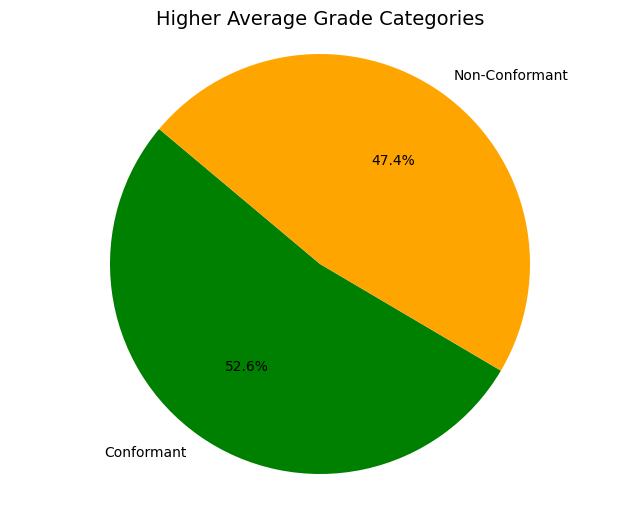

In [15]:
# Calculate which category has more programs with higher average grades
avg_grade_comparison['Higher_Category'] = avg_grade_comparison.apply(
    lambda row: 'Conformant' if row['Grade_Conformant'] > row['Grade_Non_Conformant']
    else ('Equal' if row['Grade_Conformant'] == row['Grade_Non_Conformant'] else 'Non-Conformant'),
    axis=1
)

# Count the number of programs with higher average grades in each category
higher_counts = avg_grade_comparison['Higher_Category'].value_counts()

# Display the result
print("\nCount of Higher Categories:")
print(higher_counts)
# Plot the result
plt.figure(figsize=(8, 6))
plt.pie(higher_counts, labels=higher_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'gray'])
plt.title("Higher Average Grade Categories", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


Average Score for Conformant: 7.618067046884085
Average Score for Non-Conformant: 7.65506920763696
Side with the Highest Average Score: Non-Conformant


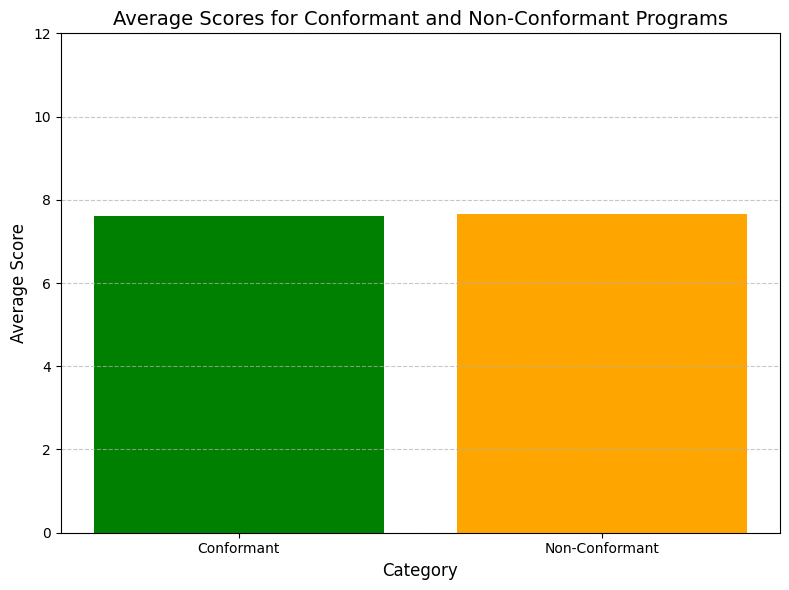

In [16]:
# Calculate the overall average score for each side (Conformant and Non-Conformant)
conformant_avg_score = avg_grade_comparison['Grade_Conformant'].mean()
non_conformant_avg_score = avg_grade_comparison['Grade_Non_Conformant'].mean()

# Determine which side has the highest overall average score
if conformant_avg_score > non_conformant_avg_score:
    highest_avg_side = "Conformant"
elif conformant_avg_score < non_conformant_avg_score:
    highest_avg_side = "Non-Conformant"
else:
    highest_avg_side = "Equal"

# Display the results
print("Average Score for Conformant:", conformant_avg_score)
print("Average Score for Non-Conformant:", non_conformant_avg_score)
print("Side with the Highest Average Score:", highest_avg_side)

# visualize the average score
# Plot the average scores
plt.figure(figsize=(8, 6))
plt.bar(['Conformant', 'Non-Conformant'], [conformant_avg_score, non_conformant_avg_score], color=['green', 'orange'])
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.ylim(0, 12)
plt.title('Average Scores for Conformant and Non-Conformant Programs', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [17]:
import pandas as pd

# Load the two datasets
conformant_log_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_log_hierarchical.csv'
non_conformant_log_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_log_hierarchical.csv'

conformant_data = pd.read_csv(conformant_log_path)
non_conformant_data = pd.read_csv(non_conformant_log_path)

# Ensure 'Grade' is numeric for analysis
conformant_data['Grade'] = pd.to_numeric(conformant_data['Grade'], errors='coerce')
non_conformant_data['Grade'] = pd.to_numeric(non_conformant_data['Grade'], errors='coerce')

# Group by 'Program' and calculate the average grade for Conformant side
conformant_performance = conformant_data.groupby('Program')['Grade'].mean().reset_index()
conformant_performance = conformant_performance.sort_values(by='Grade', ascending=False)

# Group by 'Program' and calculate the average grade for Non-Conformant side
non_conformant_performance = non_conformant_data.groupby('Program')['Grade'].mean().reset_index()
non_conformant_performance = non_conformant_performance.sort_values(by='Grade', ascending=False)

# Display the top-performing programs for each side
print("Top-Performing Programs (Conformant):")
print(conformant_performance.head())  # Top 5 Conformant programs

print("\nTop-Performing Programs (Non-Conformant):")
print(non_conformant_performance.head())  # Top 5 Non-Conformant programs

# Save results to files 
conformant_performance.to_csv('conformant_top_performing_programs_only_and.csv', index=False)
non_conformant_performance.to_csv('non_conformant_top_performing_programs_only_and.csv', index=False)


Top-Performing Programs (Conformant):
                                        Program      Grade
4   Bioinformatik og systembiologi, cand.polyt.  10.404255
33        Geofysik og rumteknologi, cand.polyt.  10.035714
29          Fysik og nanoteknologi, cand.polyt.   9.983740
5                     Bioteknologi, cand.polyt.   9.830601
27                  Farmateknologi, cand.polyt.   9.813725

Top-Performing Programs (Non-Conformant):
                                              Program      Grade
69                    Svagstrøm, Ingeniør prof, bach.  10.000000
70            Technology Entrepreneurship, cand.tech.  10.000000
19                  Design og innovation, cand.polyt.   9.599620
0   Advanced Materials and Healthcare Engineering,...   9.314286
30                Fysik og nanoteknologi, cand.polyt.   9.223131


<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:10: SyntaxWarning: invalid escape sequence '\G'
<>:9: SyntaxWarning: invalid escape sequence '\G'
<>:10: SyntaxWarning: invalid escape sequence '\G'
C:\Users\chens\AppData\Local\Temp\ipykernel_21156\1743077472.py:9: SyntaxWarning: invalid escape sequence '\G'
  conformant_file_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\conformant_students_cleaned.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_21156\1743077472.py:10: SyntaxWarning: invalid escape sequence '\G'
  non_conformant_file_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\non_conformant_students_cleaned.csv'
C:\Users\chens\AppData\Local\Temp\ipykernel_21156\1743077472.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the 

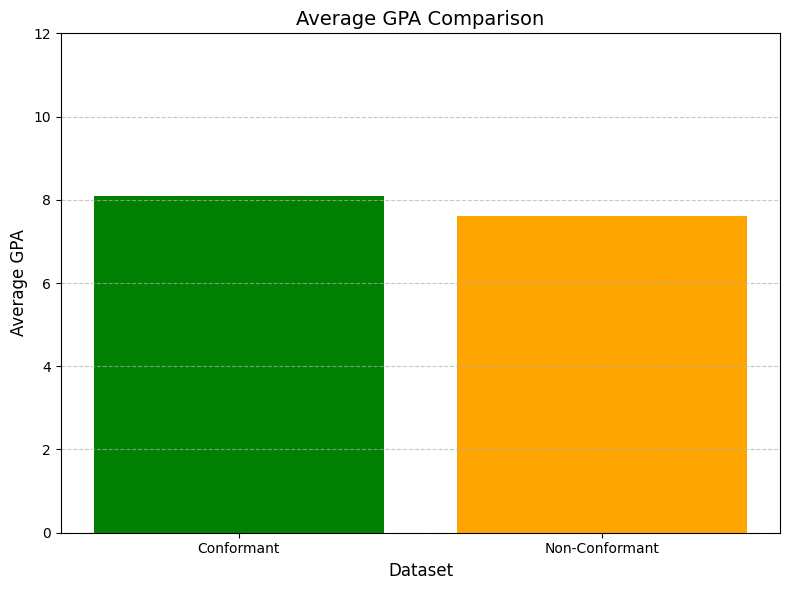

Average GPA Comparison:
                Average GPA
Conformant         8.102686
Non-Conformant     7.599745

GPA Comparison CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\gpa_comparison_only_and.csv


In [18]:
import pandas as pd


# Define file paths
# conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\conformant_log_only_and.csv'
# non_conformant_file_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\non_conformant_log_only_and.csv'

# instead of using the above datasets, we will use the refined datasets, where we remove the outliers of data.
conformant_file_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\conformant_students_cleaned.csv'
non_conformant_file_path = 'D:\Github\\02269-Process-mining-project\\data\\conformance_checking\\filtered_data\\refined_and\\non_conformant_students_cleaned.csv'

# Load datasets
conformant_students_df = pd.read_csv(conformant_file_path)
non_conformant_students_df = pd.read_csv(non_conformant_file_path)

# Function to preprocess data
def preprocess_gpa_data(df):
    # Convert Grade to numeric, coercing non-numeric values (e.g., 'BE') to NaN
    df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')
    
    # Assign default ECTS weight (1 for all courses)
    df['ECTS'] = 1
    
    # Drop rows with NaN grades (invalid grades)
    df = df.dropna(subset=['Grade'])
    return df

# Preprocess datasets
conformant_students_df = preprocess_gpa_data(conformant_students_df)
non_conformant_students_df = preprocess_gpa_data(non_conformant_students_df)

# Function to calculate GPA
def calculate_gpa(group):
    return (group['ECTS'] * group['Grade']).sum() / group['ECTS'].sum()

# Group by StudentID and calculate GPA for each dataset
conformant_students_gpa = (
    conformant_students_df.groupby('case:concept:name')  # Assuming 'case:concept:name' is the StudentID
    .apply(calculate_gpa)
    .rename('GPA')
)

non_conformant_students_gpa = (
    non_conformant_students_df.groupby('case:concept:name')  # Assuming 'case:concept:name' is the StudentID
    .apply(calculate_gpa)
    .rename('GPA')
)

# Compute the average GPA for conformant and non-conformant groups
average_gpa_conformant = conformant_students_gpa.mean()
average_gpa_non_conformant = non_conformant_students_gpa.mean()

# Prepare the final results for comparison
gpa_comparison = pd.DataFrame({
    'Average GPA': [average_gpa_conformant, average_gpa_non_conformant]
}, index=['Conformant', 'Non-Conformant'])

# Display the results
import matplotlib.pyplot as plt

# Plot the average GPA comparison
plt.figure(figsize=(8, 6))
plt.bar(gpa_comparison.index, gpa_comparison['Average GPA'], color=['green', 'orange'])
plt.title('Average GPA Comparison', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.ylim(0, 12)  # Adjust according to grading scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save GPA comparison to a CSV file
gpa_comparison_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\gpa_comparison_only_and.csv'
gpa_comparison.to_csv(gpa_comparison_path)

# Print final results
print("Average GPA Comparison:")
print(gpa_comparison)
print(f"\nGPA Comparison CSV saved at: {gpa_comparison_path}")



To further improve the robustness of the analysis, we also introduce the confidence interval calculation for the average GPA of each group for only considering using "and" condition.

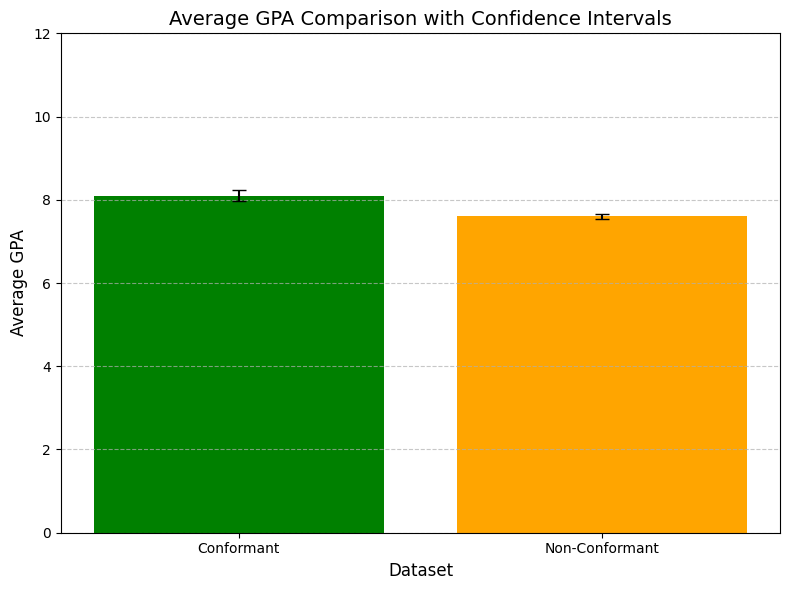

95% Confidence Interval [Conformant]: [7.9791, 8.2262]
95% Confidence Interval [Non-Conformant]: [7.5368, 7.6627]

Average GPA Comparison:
Conformant: Average GPA = 8.1027, Confidence Interval = [7.9791, 8.2262]
Non-Conformant: Average GPA = 7.5997, Confidence Interval = [7.5368, 7.6627]

GPA Comparison CSV saved at: D:\Github\02269-Process-mining-project\data\conformance_checking\gpa_comparison_with_ci.csv


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to calculate confidence intervals using z-distribution
def confidence_interval_large_sample(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Use sample standard deviation
    z_critical = norm.ppf((1 + confidence) / 2)  # Z-critical value
    margin_of_error = z_critical * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals for both groups
ci_conformant = confidence_interval_large_sample(conformant_students_gpa, confidence=0.95)
ci_non_conformant = confidence_interval_large_sample(non_conformant_students_gpa, confidence=0.95)

# Prepare the final results for comparison
gpa_comparison = pd.DataFrame({
    'Average GPA': [average_gpa_conformant, average_gpa_non_conformant],
    'Confidence Interval (Lower)': [ci_conformant[0], ci_non_conformant[0]],
    'Confidence Interval (Upper)': [ci_conformant[1], ci_non_conformant[1]]
}, index=['Conformant', 'Non-Conformant'])

# Plot the average GPA comparison with confidence intervals
plt.figure(figsize=(8, 6))
plt.bar(
    gpa_comparison.index,
    gpa_comparison['Average GPA'],
    yerr=[
        gpa_comparison['Average GPA'] - gpa_comparison['Confidence Interval (Lower)'],
        gpa_comparison['Confidence Interval (Upper)'] - gpa_comparison['Average GPA']
    ],
    capsize=5,
    color=['green', 'orange']
)
plt.title('Average GPA Comparison with Confidence Intervals', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.ylim(0, 12)  # Adjust according to grading scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save GPA comparison to a CSV file
gpa_comparison_path = 'D:\\Github\\02269-Process-mining-project\\data\\conformance_checking\\gpa_comparison_with_ci.csv'
gpa_comparison.to_csv(gpa_comparison_path)

# Print final results
print("95% Confidence Interval [Conformant]: [{:.4f}, {:.4f}]".format(ci_conformant[0], ci_conformant[1]))
print("95% Confidence Interval [Non-Conformant]: [{:.4f}, {:.4f}]".format(ci_non_conformant[0], ci_non_conformant[1]))

print("\nAverage GPA Comparison:")
for index, row in gpa_comparison.iterrows():
    print(f"{index}: Average GPA = {row['Average GPA']:.4f}, "
          f"Confidence Interval = [{row['Confidence Interval (Lower)']:.4f}, {row['Confidence Interval (Upper)']:.4f}]")

print(f"\nGPA Comparison CSV saved at: {gpa_comparison_path}")